# Data Analysis Project: E-Commerce Public Dataset


## Business Questions

- How are the sales trends in this dataset?
- What are the best-selling and least-selling products?
- What are the demographics of the sellers?

## Preparing all the necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 15.6 MB/s eta 0:00:00


In [3]:
pip install squarify

In [4]:
import numpy as np
import pandas as pd
import unidecode
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

## Data Wrangling

### Gathering Data

In [5]:
customers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
items_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
payments_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
reviews_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
orders_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
category_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv")
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
products_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
sellers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

####Customers

In [14]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [16]:
print("Number of duplicates: ", customers_df.duplicated().sum())

Number of duplicates:  0


In [17]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####Geolocation

In [18]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [19]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [20]:
print("Number of duplicates: ", geolocation_df.duplicated().sum())

Number of duplicates:  261831


In [21]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


####Items

In [22]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


There is a data type error in the `shipping_limit_date` column

In [23]:
items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [24]:
print("Number of duplicates: ", items_df.duplicated().sum())

Number of duplicates:  0


In [25]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####Payments

In [26]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [28]:
print("Number of duplicates: ", payments_df.duplicated().sum())

Number of duplicates:  0


In [29]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####Reviews

In [30]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


There is a data type error in the `review_creation_date` and `review_answer_timestamp` columns

In [31]:
reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [32]:
print("Number of duplicates: ", reviews_df.duplicated().sum())

Number of duplicates:  0


In [33]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


####Orders

In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


There is a data type error for the columns: `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date`.

In [35]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [36]:
print("Number of duplicates: ", orders_df.duplicated().sum())

Number of duplicates:  0


In [37]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####Category

In [38]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [39]:
category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [40]:
print("Number of duplicates: ", category_df.duplicated().sum())

Number of duplicates:  0


In [41]:
category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####Products

In [42]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [43]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [44]:
print("Number of duplicates: ", products_df.duplicated().sum())

Number of duplicates:  0


In [45]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


####Sellers

In [46]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [47]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [48]:
print("Number of duplicates: ", sellers_df.duplicated().sum())

Number of duplicates:  0


In [49]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Geolocation

In [50]:
geolocation_df['geolocation_city'].unique() # Duplicates occur due to the spelling of city names with accents.

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [51]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [52]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(pretty_string) # mengubah nama kota

In [53]:
geolocation_df = geolocation_df.drop_duplicates('geolocation_zip_code_prefix') # drop the other duplicates
geolocation_df = geolocation_df.reset_index(drop=True)

Items

In [54]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'], format='%Y-%m-%d %H:%M', errors='coerce') # change the data type to datetime

Reviews

In [55]:
# changing the data type to datetime
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], format='%Y-%m-%d %H:%M', errors='coerce')
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'], format='%Y-%m-%d %H:%M', errors='coerce')

In [56]:
# filling missing value
reviews_df['review_comment_title'].fillna('No Review Title')
reviews_df['review_comment_message'].fillna('No Review Message')

,review_comment_message
0,No Review Message
1,No Review Message
2,No Review Message
3,Recebi bem antes do prazo estipulado.
4,Parabéns lojas lannister adorei comprar pela I...
...,...
99219,No Review Message
99220,No Review Message
99221,"Excelente mochila, entrega super rápida. Super..."
99222,No Review Message


Orders

In [57]:
# changing the data type to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

In [58]:
# filling missing value
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'])

,order_delivered_customer_date
0,2017-10-10 21:25:13
1,2018-08-07 15:27:45
2,2018-08-17 18:06:29
3,2017-12-02 00:28:42
4,2018-02-16 18:17:02
...,...
99436,2017-03-17 15:08:01
99437,2018-02-28 17:37:56
99438,2017-09-21 11:24:17
99439,2018-01-25 23:32:54


The `order_delivered_carrier_date` column is left as is for now because it will be used for RFM Analysis

Products

In [59]:
# filling missing value
products_df['product_weight_g'].fillna(products_df['product_weight_g'].median())
products_df['product_length_cm'].fillna(products_df['product_length_cm'].median())
products_df['product_height_cm'].fillna(products_df['product_height_cm'].median())
products_df['product_width_cm'].fillna(products_df['product_width_cm'].median())
products_df.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis= 1, inplace= True)

In [60]:
products_df.product_category_name.value_counts() # finding the mode

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [62]:
products_df.fillna(value="cama_mesa_banho") # filling missing value

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700.0,31.0,13.0,20.0


## Exploratory Data Analysis (EDA)

### Explore Customer

In [63]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [64]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


In [65]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [66]:
# checking the number of orders made by each customer
customer_unique_ids = customers_df[['customer_unique_id']].to_numpy().flatten()
unique, counts = np.unique(customer_unique_ids, return_counts = True)
customer_unique_ids_counts = dict(zip(unique, counts))
count, count_of_counts = np.unique(counts, return_counts = True)
multiple_orders = dict(zip(count, count_of_counts))

### Explore Geolocation

In [67]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,19015.000000,19015.000000,19015.000000,19015,19015
unique,NaN,NaN,NaN,5771,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,3180,6349
mean,42711.591901,-19.062087,-46.058008,NaN,NaN
std,30905.051745,7.319402,5.380751,NaN,NaN
min,1001.000000,-36.605374,-72.927296,NaN,NaN
25%,12721.500000,-23.564386,-49.000445,NaN,NaN
50%,38240.000000,-22.429252,-46.632544,NaN,NaN
75%,70656.500000,-15.615448,-43.255324,NaN,NaN


###Explore Items

In [68]:
items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,0,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaT,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,NaT,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaT,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaT,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaT,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,NaT,6735.000000,409.680000


In [69]:
items_df.groupby(by="price").order_id.nunique().sort_values(ascending=False)

,order_id
price,
59.90,2087
69.90,1821
49.90,1675
89.90,1419
99.90,1319
...,...
3109.99,1
3105.00,1
3099.90,1


### Explore Payments

In [70]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [71]:
payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


### Explore Reviews

In [72]:
reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,0,0
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,NaT,NaT
min,NaN,NaN,1.000000,NaN,NaN,NaT,NaT
25%,NaN,NaN,4.000000,NaN,NaN,NaT,NaT
50%,NaN,NaN,5.000000,NaN,NaN,NaT,NaT
75%,NaN,NaN,5.000000,NaN,NaN,NaT,NaT
max,NaN,NaN,5.000000,NaN,NaN,NaT,NaT


In [73]:
reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

,review_id
review_score,
5,56910
4,19007
1,11282
3,8097
2,3114


### Explore Orders

In [74]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [75]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


### Explore Category

In [76]:
category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Explore Products

In [77]:
products_df.describe(include="all")

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951.0,32951.0,32951.0
unique,32951,73,2205.0,100.0,103.0,96.0
top,106392145fca363410d287a815be6de4,cama_mesa_banho,200.0,16.0,10.0,11.0
freq,1,3639,2084.0,5520.0,2548.0,3718.0


In [78]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3639
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


### Explore Sellers

In [79]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [80]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
aguas claras df,1
ao bernardo do campo,1
angra dos reis rj,1


In [81]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


### Explore All Data

In [82]:
# merge
all_df = customers_df.merge(
    geolocation_df.rename(columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"}),
    on="customer_zip_code_prefix",
    how='left'
)

In [83]:
# merge
all_df = all_df.merge(orders_df, on="customer_id", how='inner')
all_df = all_df.merge(reviews_df, on="order_id", how='inner')
all_df = all_df.merge(items_df, on="order_id", how='inner')
all_df = all_df.merge(products_df, on="product_id", how='inner')
all_df = all_df.merge(payments_df, on="order_id", how='inner')
all_df = all_df.merge(sellers_df, on='seller_id', how='inner')
all_df = all_df.merge(category_df, on='product_category_name', how='inner')
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,...,64.0,31.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,...,15.0,40.0,1,credit_card,8,335.48,88303,itajai,SC,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,...,52.0,17.0,1,credit_card,7,157.73,8577,itaquaquecetuba,SP,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,...,51.0,28.0,1,credit_card,1,173.30,8577,itaquaquecetuba,SP,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,...,15.0,35.0,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort


In [84]:
# extracting the month and year from the timestamp

all_df['order_purchase_year_month'] = all_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m'))

In [85]:
# delivery arrival status (on time/early and late)
all_df['arrival_status'] = np.where((all_df['order_estimated_delivery_date'] - all_df['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_purchase_year_month,arrival_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,...,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture,2017-05,OnTime/Early
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,...,1,credit_card,8,335.48,88303,itajai,SC,housewares,2018-01,OnTime/Early
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,...,1,credit_card,7,157.73,8577,itaquaquecetuba,SP,office_furniture,2018-05,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,...,1,credit_card,1,173.30,8577,itaquaquecetuba,SP,office_furniture,2018-03,OnTime/Early
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,...,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort,2018-07,OnTime/Early


## Visualization & Explanatory Analysis

### How are the sales trends in this dataset?

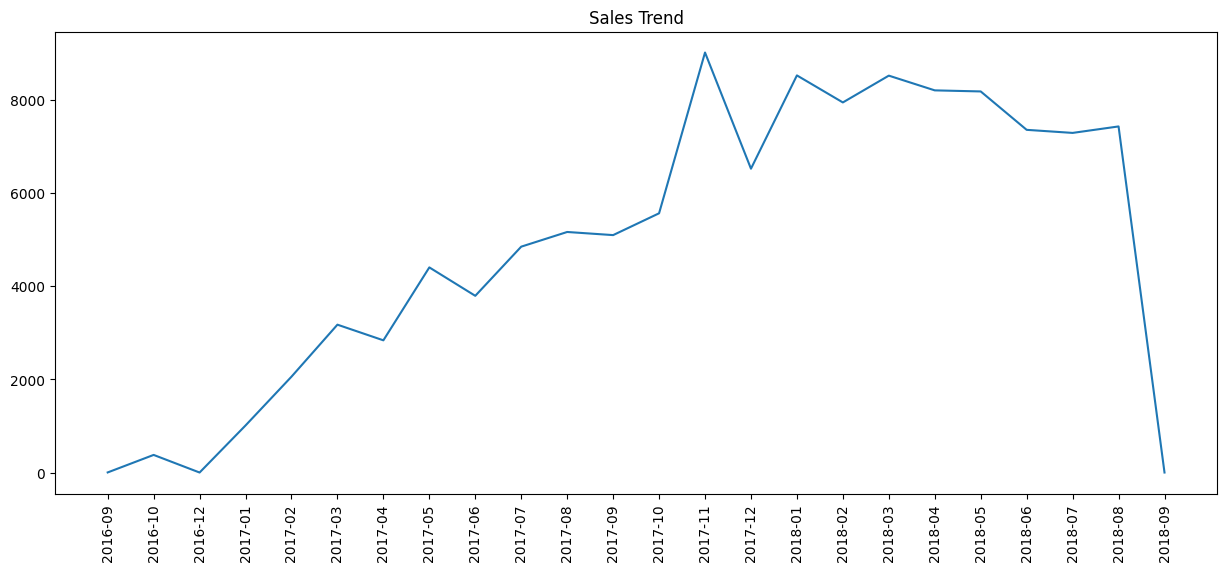

In [88]:
plt.figure(figsize=(15,6))
plt.plot(all_df["order_purchase_year_month"].value_counts().sort_index())
plt.title('Sales Trend')
plt.xticks(rotation=90)
plt.show()

### What are the best-selling and least-selling products?

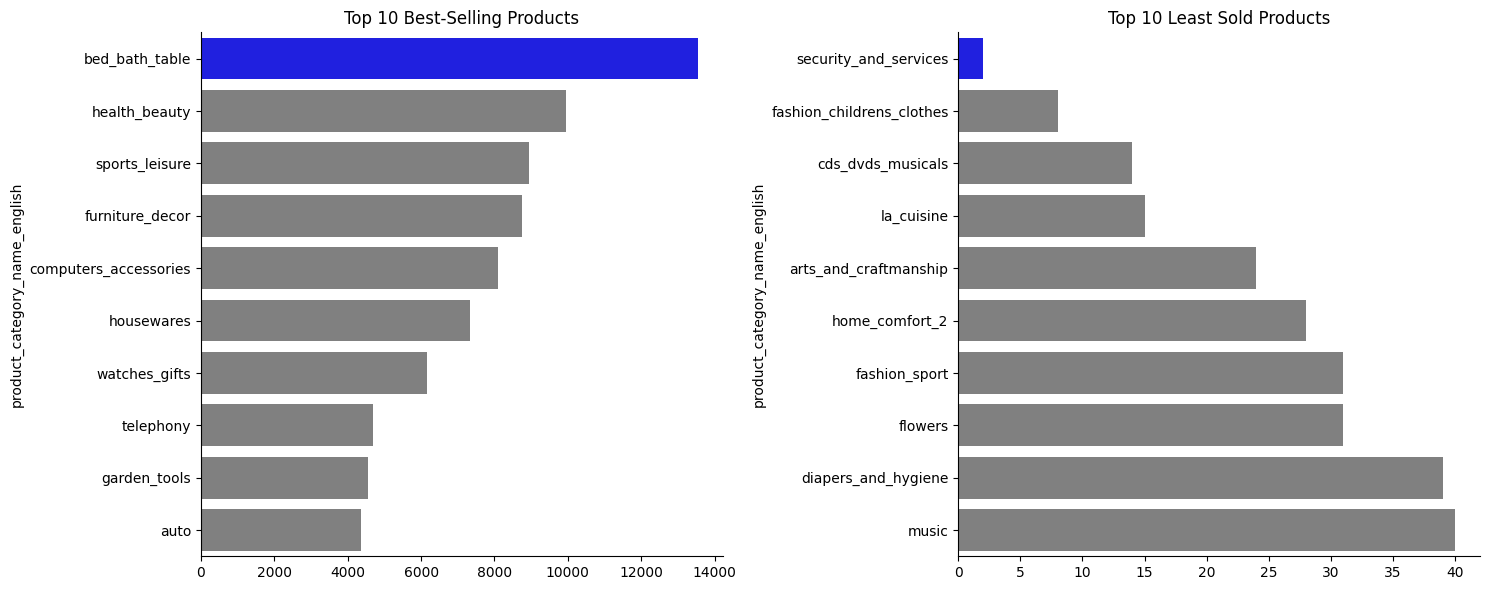

In [91]:
data = all_df.product_category_name_english.value_counts()

# Determine the overall most frequent category (for the first plot)
max_category = data.idxmax()

# Get the indices for the top 10 and bottom 10 once
top_10_index = data.index[:10]
sorted_counts = all_df.product_category_name_english.value_counts().sort_values()
bottom_10_index = sorted_counts.index[:10]

# Determine the least sold product (the very first one in sorted_counts)
least_sold_category = sorted_counts.index[0]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First subplot – Top 10 Best-Selling Products (highlights overall best-seller)
sns.barplot(
    x=data.values[:10],
    y=data.index[:10],
    hue=[True if x == max_category else False for x in top_10_index],
    palette={True: "blue", False: "gray"},
    ax=axes[0],
    legend=False
)
axes[0].set_title('Top 10 Best-Selling Products')
axes[0].tick_params(axis='x')
sns.despine(ax=axes[0])

# Second subplot – Top 10 Least Sold Products (highlights the least sold product)
sns.barplot(
    x=sorted_counts.values[:10],
    y=sorted_counts.index[:10],
    hue=[True if x == least_sold_category else False for x in bottom_10_index],
    palette={True: "blue", False: "gray"},
    ax=axes[1],
    legend=False
)
axes[1].set_title('Top 10 Least Sold Products')
axes[1].tick_params(axis='y')
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

### What are the demographics of the customers?

Based on City and State

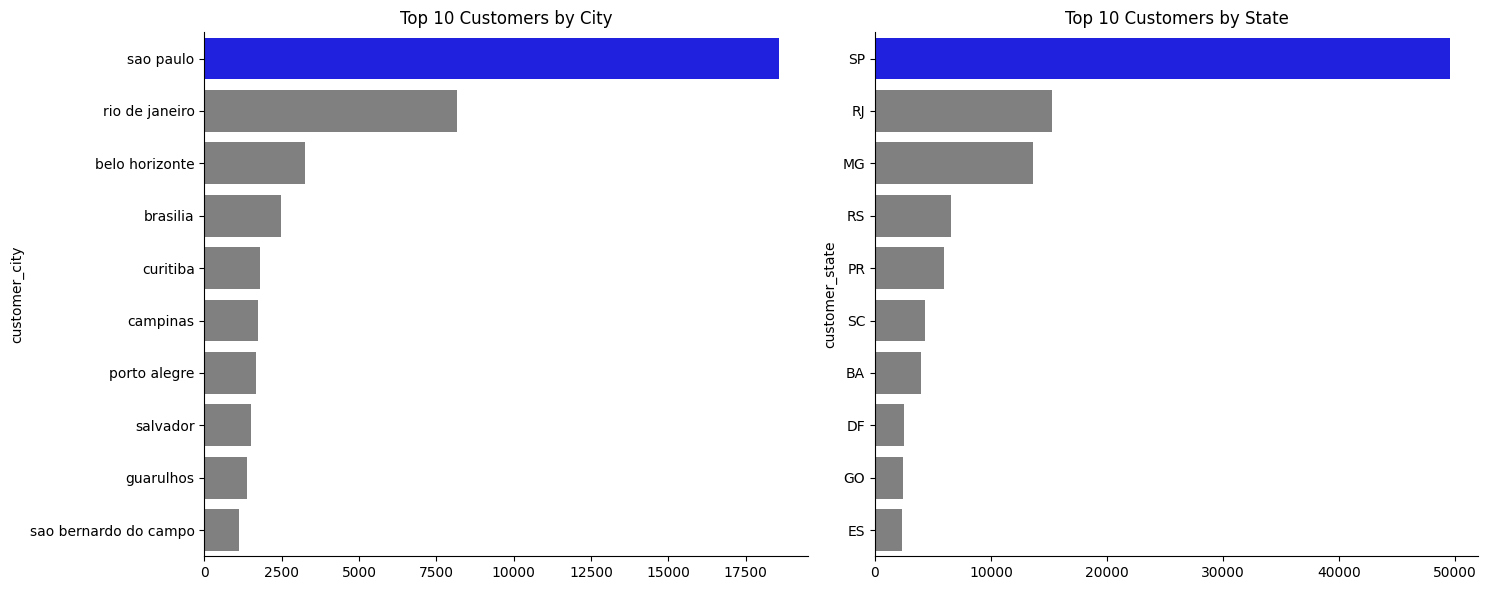

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First subplot – Top 10 Customers by City
city_counts = all_df['customer_city'].value_counts()
top_10_cities = city_counts.index[:10]
max_city = city_counts.idxmax()

highlight_hue_cities = [True if x == max_city else False for x in top_10_cities]

sns.barplot(
    x=city_counts.values[:10],
    y=top_10_cities,
    hue=highlight_hue_cities,
    palette={True: "blue", False: "gray"},
    ax=axes[0],
    legend=False
)
axes[0].set_title('Top 10 Customers by City')
axes[0].tick_params(axis='x')
sns.despine(ax=axes[0])

# Second subplot – Top 10 Customers by State
state_counts = all_df['customer_state'].value_counts()
top_10_states = state_counts.index[:10]
max_state = state_counts.idxmax() # Get the most frequent state

highlight_hue_states = [True if x == max_state else False for x in top_10_states]

sns.barplot(
    x=state_counts.values[:10],
    y=top_10_states,
    hue=highlight_hue_states,
    palette={True: "blue", False: "gray"},
    ax=axes[1],
    legend=False
)
axes[1].set_title('Top 10 Customers by State')
axes[1].tick_params(axis='x')
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

Based on Payment Type

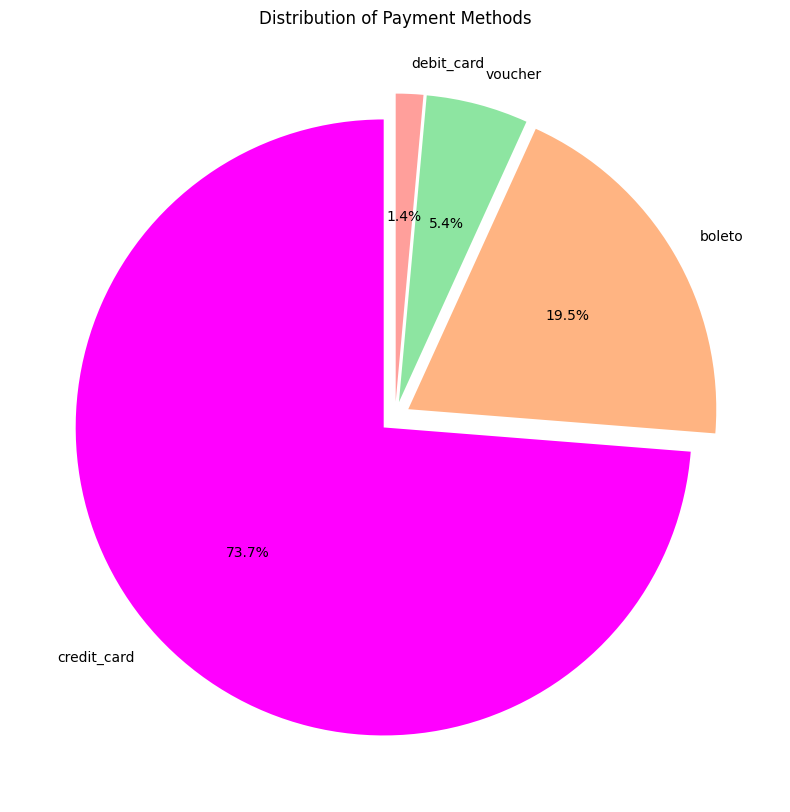

In [96]:
payment_counts = all_df['payment_type'].value_counts()

pastel_colors = sns.color_palette("pastel", len(payment_counts))
colors = ['magenta' if x == payment_counts.idxmax() else pastel_colors[i] for i, x in enumerate(payment_counts.index)]

plt.figure(figsize=[10, 10])
plt.pie(payment_counts.values,
        explode=(0.05, 0.05, 0.05, 0.05),
        labels=payment_counts.index,
        autopct='%1.1f%%',
        shadow=False,
        startangle=90,
        colors=colors
       )
plt.title('Distribution of Payment Methods')
plt.show()

Based on Review Scores

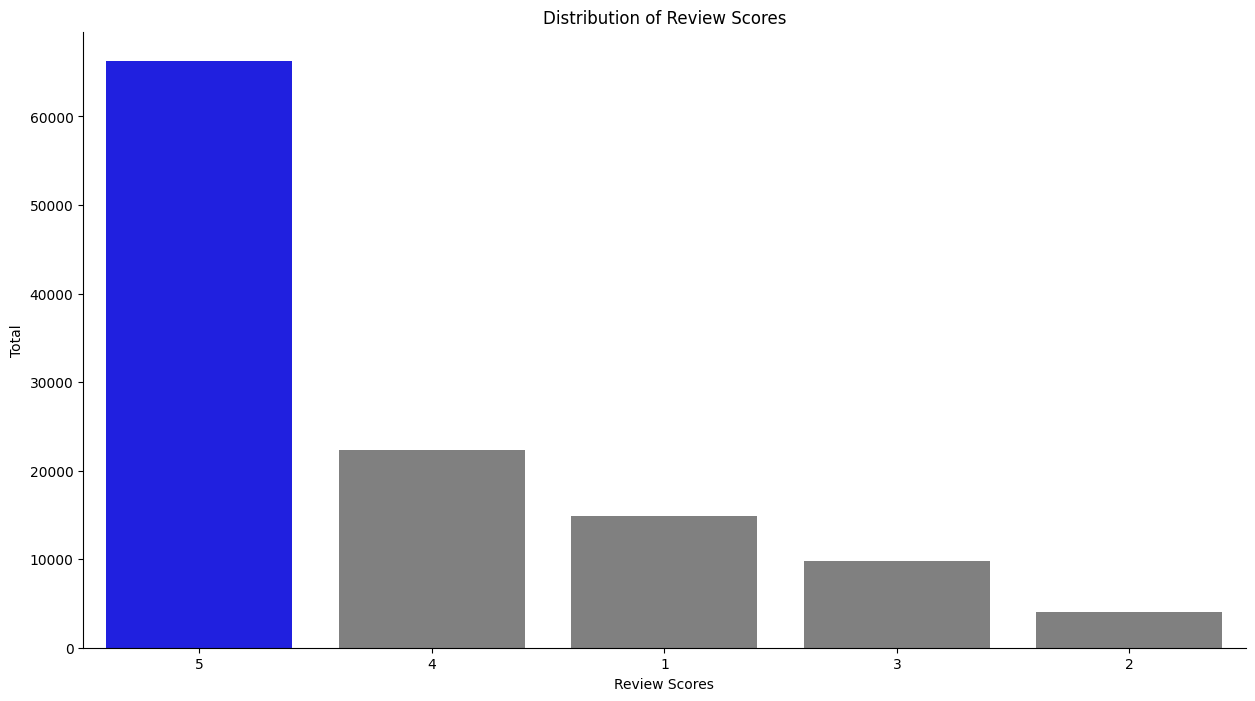

In [99]:
review_score_counts = all_df['review_score'].value_counts()

max_review_score = review_score_counts.idxmax()

review_score_index = [str(i) for i in review_score_counts.index]

highlight_hue_review = [True if str(x) == str(max_review_score) else False for x in review_score_counts.index]

plt.figure(figsize=[15, 8])

sns.barplot(
    x=review_score_index,
    y=review_score_counts.values,
    hue=highlight_hue_review,
    palette={True: "blue", False: "gray"},
    legend=False
)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Total')
sns.despine()
plt.show()

Based on Customer Order Frequency

Text(0.5, 1.0, 'Customer Order Frequency')

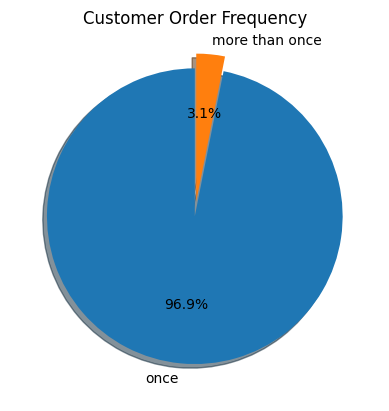

In [101]:
labels = 'once', 'more than once'
sizes = multiple_orders[1], sum(multiple_orders.values()) - multiple_orders[1]
explode = (0,0.1)
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title('Customer Order Frequency')

## Conclusion

- Overall, sales increased from September 2016 to March 2018. There was a sharp decline from March 2018 to September 2018. The highest sales were about 8,000, which occurred around the beginning of 2018.
- The best-selling product is “bed bath table,” and the least-selling product is “security and services.”
- Most customers come from the city of Sao Paulo and the state of SP, pay using credit cards, and give a review score of 5. However, most customers place orders only once.

## RFM Analysis

In [102]:
last_date = all_df['order_delivered_carrier_date'].max() + pd.to_timedelta(1, 'D')

rfm_df = all_df.dropna(subset=['order_delivered_carrier_date'])\
            .reset_index()\
            .groupby('customer_id')\
            .agg(recency = ('order_delivered_carrier_date', lambda x: (last_date - x.max()).days ),
                 frequency = ('order_id', 'size'),
                 monetary = ('payment_value', 'sum'))

In [103]:
rfm_df

,recency,frequency,monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74
000161a058600d5901f007fab4c27140,420,1,67.41
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42
0002414f95344307404f0ace7a26f1d5,389,1,179.35
000379cdec625522490c315e70c7a9fb,161,1,107.01
...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,179,1,91.91
fffecc9f79fd8c764f843e9951b11341,165,3,81.36
fffeda5b6d849fbd39689bb92087f431,110,1,63.13


In [104]:
rfm_df.describe()

,recency,frequency,monetary
count,96906.000000,96906.000000,96906.000000
mean,250.384692,1.197769,204.924572
std,152.682141,0.749310,605.725341
min,1.000000,1.000000,9.590000
25%,127.000000,1.000000,62.800000
50%,231.000000,1.000000,109.810000
75%,359.000000,1.000000,195.887500
max,704.000000,63.000000,109312.640000


In [105]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,recency,frequency,monetary
customer_id,,,
a35878bee339b45240b5a327d933509b,1,1,42.50
4b7decb9b58e2569548b8b4c8e20e8d7,8,1,166.46
548692bdcbd6e3683ff306ac9d8418d6,9,1,2455.12
5f1f934f0527b0822763ecfc7a918ca7,12,3,182.61
44e460a655f7154ccd9faa4dbbbaf68a,12,1,75.71


In [106]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,recency,frequency,monetary
customer_id,,,
270c23a11d024a44c896d1894b261a83,398,63,483.96
13aa59158da63ba0e93ec6ac2c07aacb,344,38,411.48
9af2372a1e49340278e7c1ef8d749f34,506,29,457.99
92cd3ec6e2d643d4ebd0e3d6238f69e2,453,26,62.68
d22f25a9fadfb1abbc2e29395b1239f4,121,24,1333.80


In [107]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,recency,frequency,monetary,r_rank,f_rank,m_rank
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,32965.0,42133.5,50344.0
000161a058600d5901f007fab4c27140,420,1,67.41,16179.5,42133.5,27413.0
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,2459.5,42133.5,72605.5
0002414f95344307404f0ace7a26f1d5,389,1,179.35,20377.5,42133.5,69647.0
000379cdec625522490c315e70c7a9fb,161,1,107.01,64633.0,42133.5,47357.5


In [108]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,34.017501,43.478732,51.951376
000161a058600d5901f007fab4c27140,420,1,67.41,16.696077,43.478732,28.288238
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,2.538027,43.478732,74.923637
0002414f95344307404f0ace7a26f1d5,389,1,179.35,21.028110,43.478732,71.870679
000379cdec625522490c315e70c7a9fb,161,1,107.01,66.696593,43.478732,48.869523


In [109]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df.head(5)

,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,RFM_score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,34.02,43.48,51.95,2.34
000161a058600d5901f007fab4c27140,420,1,67.41,16.70,43.48,28.29,1.54
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,2.54,43.48,74.92,2.76
0002414f95344307404f0ace7a26f1d5,389,1,179.35,21.03,43.48,71.87,2.81
000379cdec625522490c315e70c7a9fb,161,1,107.01,66.70,43.48,48.87,2.50


In [110]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top", (np.where(
        rfm_df['RFM_score'] > 4, "High",(np.where(
            rfm_df['RFM_score'] > 3, "Medium", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low', 'lost customers'))))))

rfm_df[['RFM_score', 'customer_segment']].head(5)

,RFM_score,customer_segment
customer_id,,
00012a2ce6f8dcda20d059ce98491703,2.34,Low
000161a058600d5901f007fab4c27140,1.54,lost customers
0001fd6190edaaf884bcaf3d49edf079,2.76,Low
0002414f95344307404f0ace7a26f1d5,2.81,Low
000379cdec625522490c315e70c7a9fb,2.50,Low


In [111]:
segmentwise = rfm_df.groupby('customer_segment').agg(RecencyMean = ('recency', 'mean'),
                                          FrequencyMean = ('frequency', 'mean'),
                                          MonetaryMean = ('monetary', 'mean'),
                                          GroupSize = ('recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
customer_segment,,,,
High,237.042243,2.404812,730.961961,5279
Low,249.261216,1.054267,104.783487,46050
Medium,220.354047,1.198758,318.578208,23189
Top,109.426074,3.267233,1457.803741,2002
lost customers,304.380114,1.005003,42.595883,20386


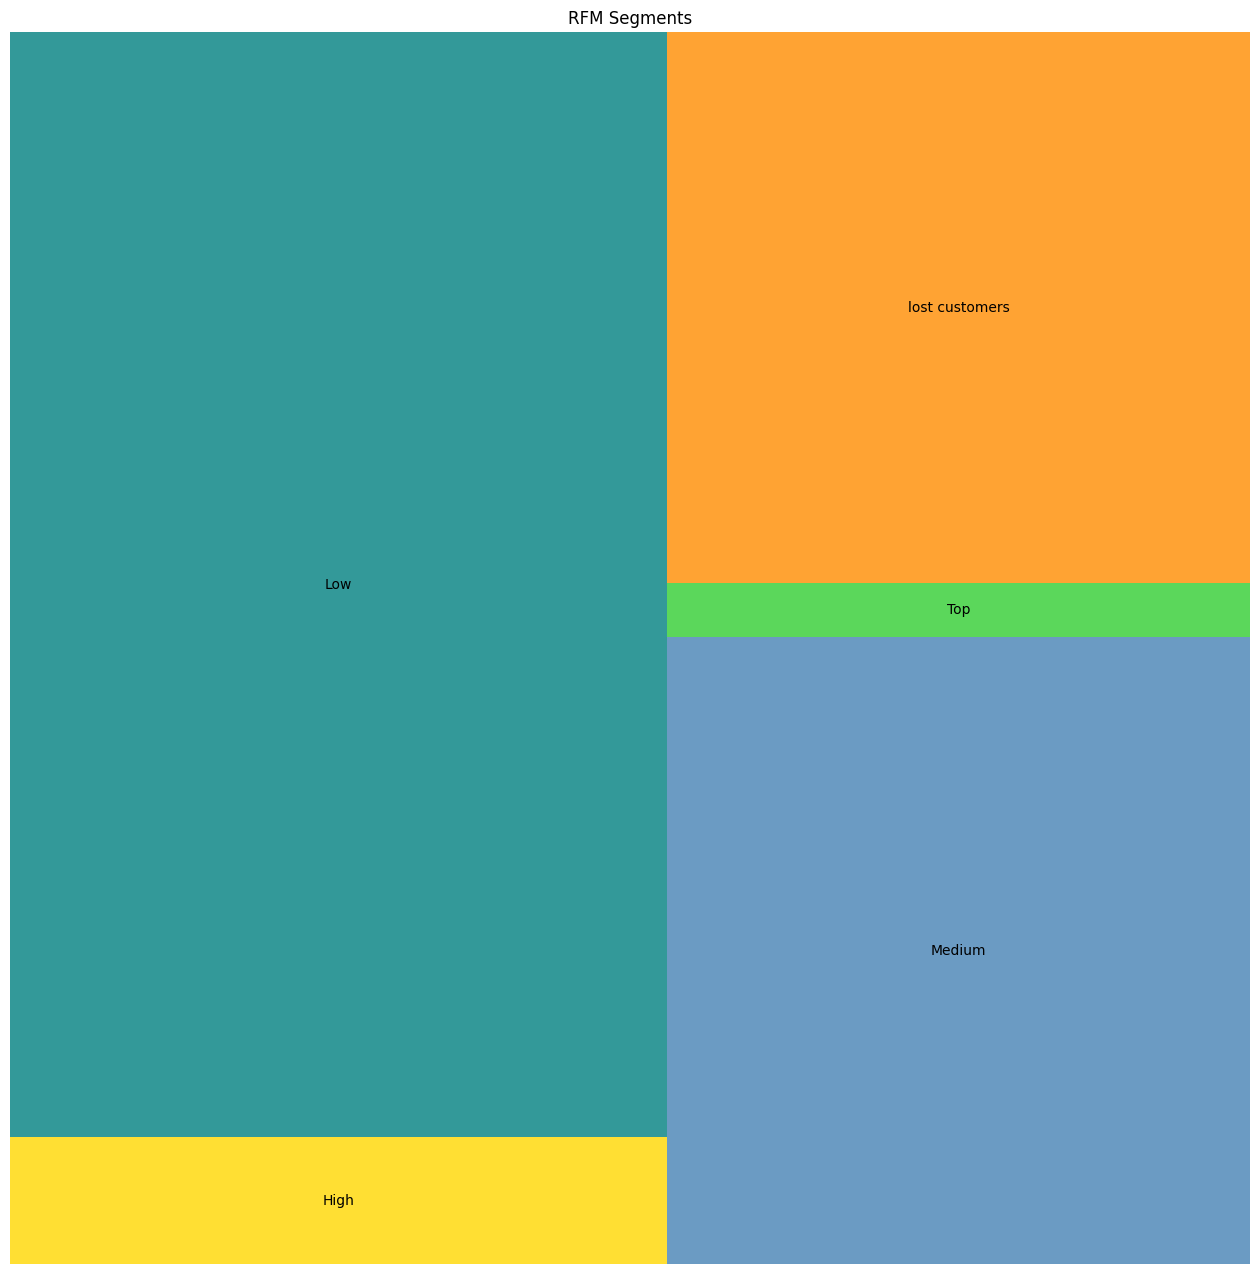

In [112]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes = segmentwise['GroupSize'],
              label = segmentwise.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments")
plt.axis('off')
plt.show()